# 앤스콤 데이터 집합 불러오기

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

# matplotlib 라이브러리로 간단한 그래프 그리기

<IPython.core.display.Javascript object>


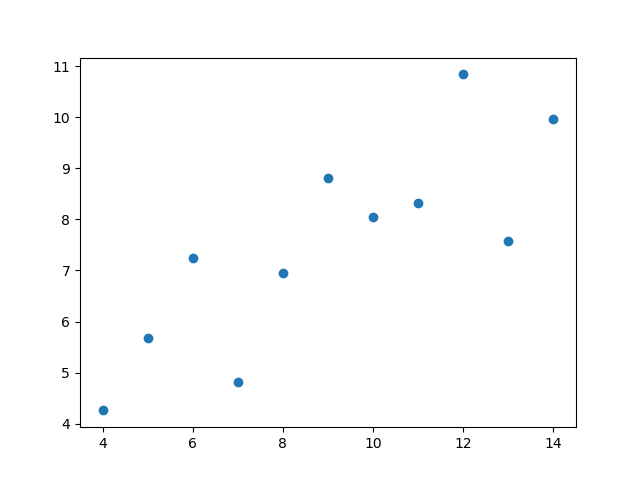

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']

plt.plot(dataset_1['x'], dataset_1['y'], 'o')

# 한 번에 4개의 그래프 그리기

<IPython.core.display.Javascript object>


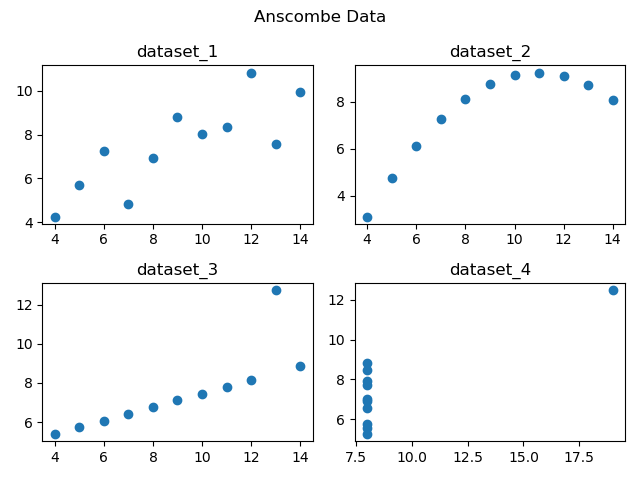

<IPython.core.display.Javascript object>


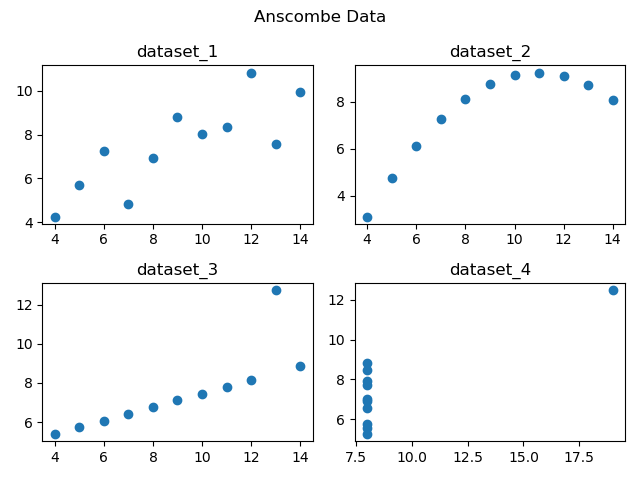

In [10]:
#dataset의 열값이 1,2,3,4인 것을 불린 추출하여 저장하기

dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#그래프 격자의 틀 만들기
fig = plt.figure()

#그래프 격자 그리기

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

#plot 메서드를 활용하여 그래프 그리기(점)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

#그래프를 확인하기 위해서는 fig를 입력해라
fig

<IPython.core.display.Javascript object>


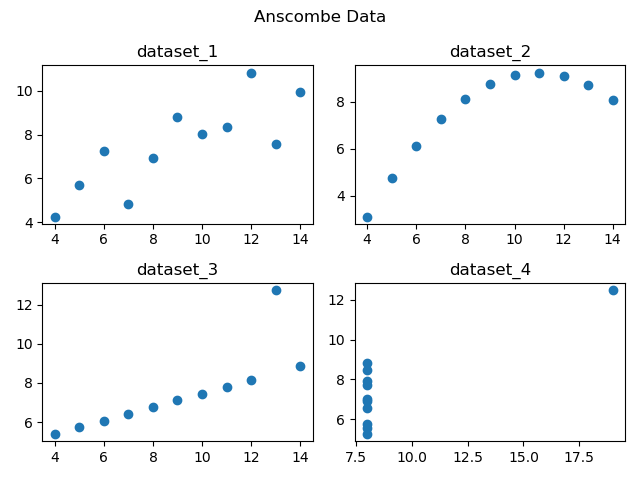

In [13]:
#set_title 메서드를 활용한 그래프 격자 제목 만들기

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

#suptitle을 활용하여 기본틀에 제목 만들기

fig.suptitle("Anscombe Data")

fig

#tight_layout 메서드를 활용하여 그래프 이름과 숫자가 겹치지 않게 하기

fig.tight_layout()

fig

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [14]:
#seaborn 안에 있는 dataset인 tips를 불러오기

tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


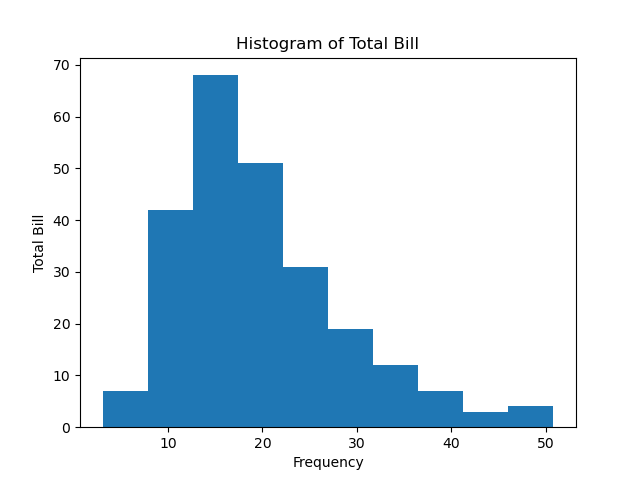

<IPython.core.display.Javascript object>


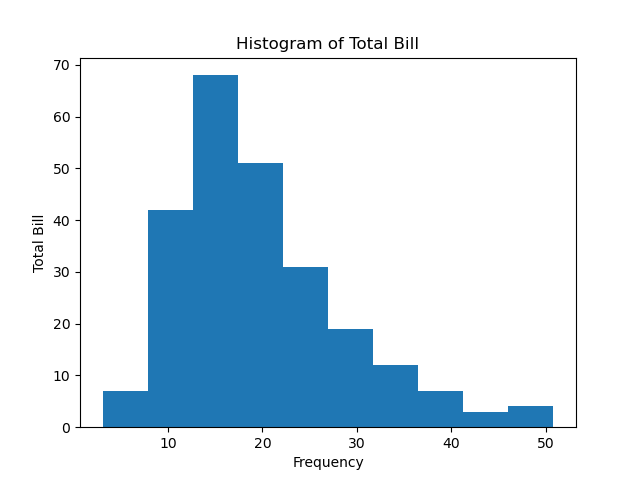

In [17]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

#히스토그램 그리기 ( bins = x축 간격을 10으로 하겠다)

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

<IPython.core.display.Javascript object>


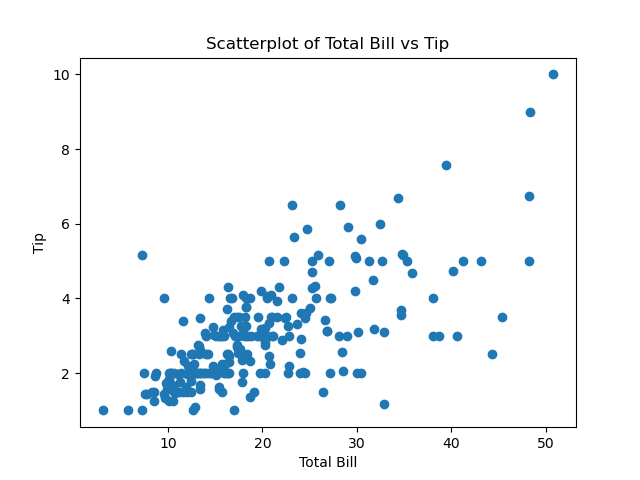

Text(0, 0.5, 'Tip')

In [19]:
#산점도 그래프 그리기

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


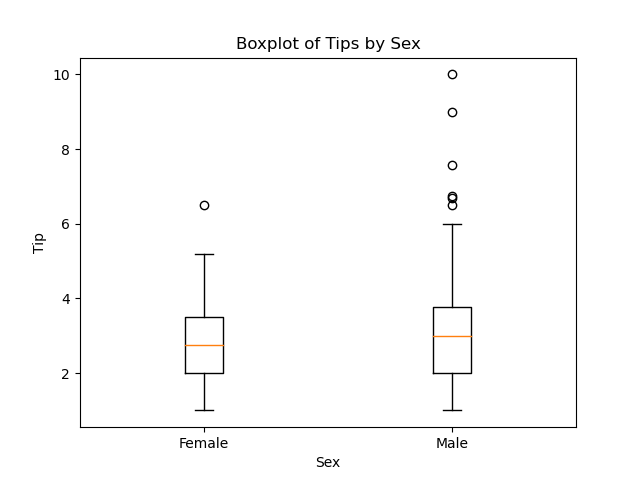

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [20]:
# boxplot 그리기

boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex'] == 'Male']['tip']], labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

<IPython.core.display.Javascript object>


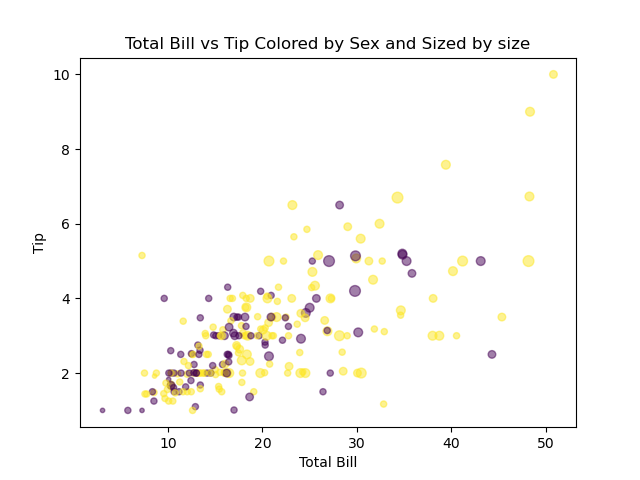

Text(0, 0.5, 'Tip')

In [21]:
#다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프

#성별은 산점도 그래프에서 색상으로 구분하면 적당하지만 문자열은 그래프의 색상을 지정하는 값으로 사용할 수 없으므로, 정수를 적용한다.

def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
#sex_color열 추가하기

tips['sex_color'] = tips['sex'].apply(recode_sex)

# 테이블당 인원 수 = s, 점의 색상 = c, 투명도 = alpha

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# 단변량 그래프 그리기 - 히스토그램

In [2]:
#seaborn 라이브러리 불러오기, seaborn 라이브러리는 matplotlib 라이브러리를 기반으로 만든 라이브러리

import seaborn as sns

tips = sns.load_dataset("tips")

<IPython.core.display.Javascript object>


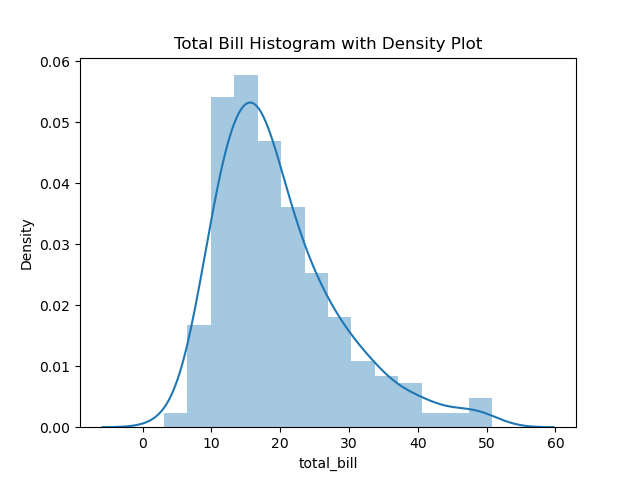

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [23]:
#subplots 메서드로 기본틀을 만든다.

ax = plt.subplots()

#distplot 메서드로 히스토그램을 그린다.
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

<IPython.core.display.Javascript object>


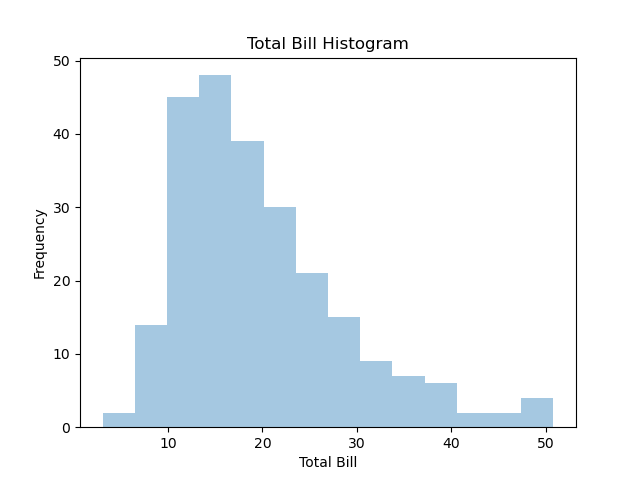

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


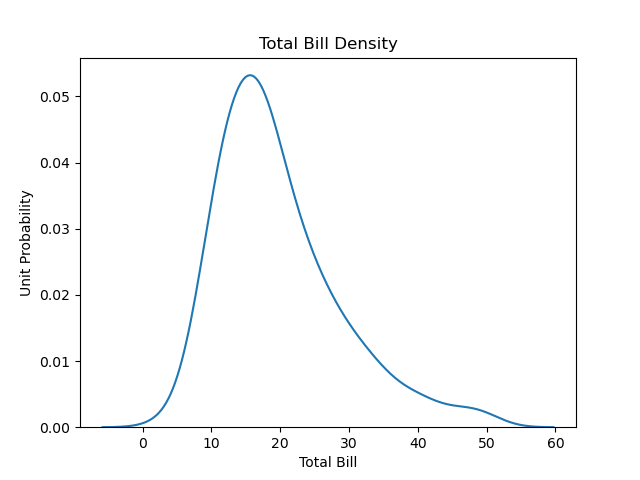

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


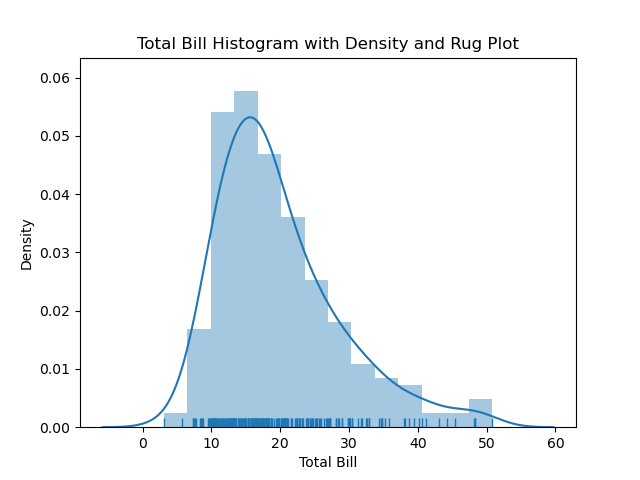

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


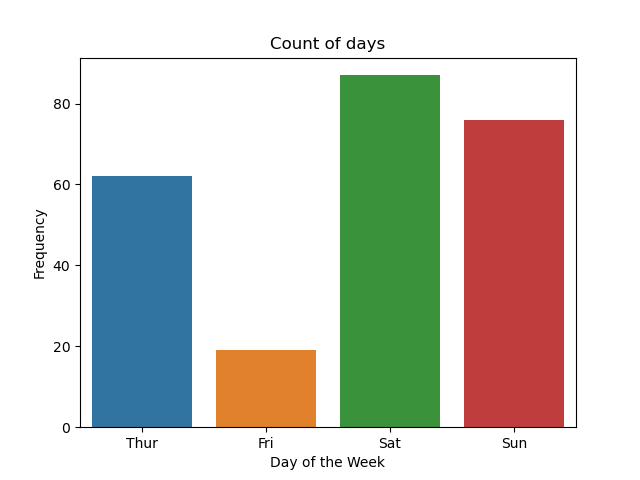

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

In [27]:
#distplot 메서드는 히스토그램과 밀집도 그래프를 같이 그린다. 만일 밀집도 그래프를 없애고 싶다면 kde = False

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

#distplot 메서드는 히스토그램과 밀집도 그래프를 같이 그린다. 만일 히스토그램 그래프를 없애고 싶다면 hist=False
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

# 양탄자 그래프를 추가하기 (양탄자 그래프는 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프), rug=True

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

# count 그래프를 그리기
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

# 다변량 그래프 그리기

<IPython.core.display.Javascript object>


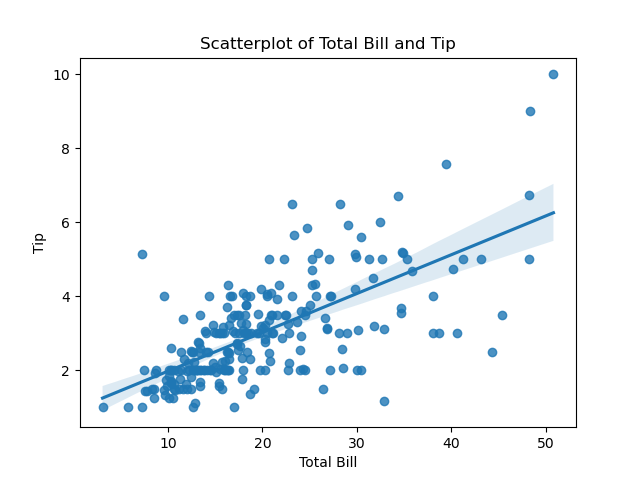

<IPython.core.display.Javascript object>


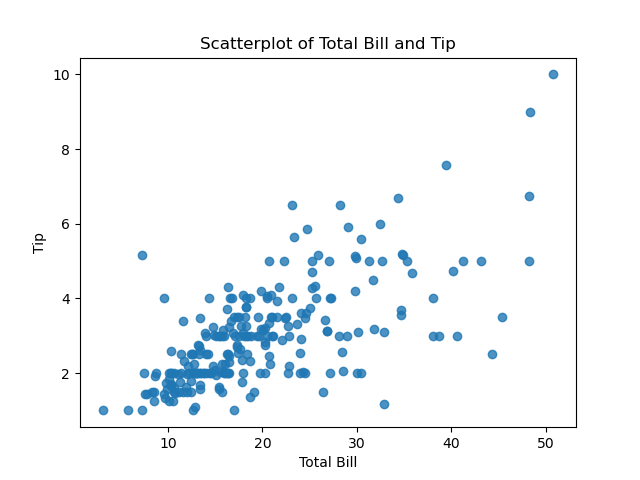

<IPython.core.display.Javascript object>


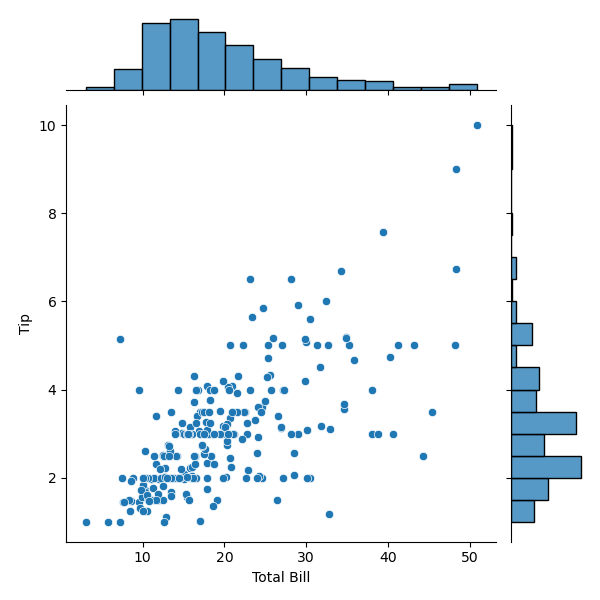

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [31]:
# 회귀선을 같이 표현하는 법

ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# 회귀선을 지우고 표현하는 법 (fit_reg = False)

ax=plt.subplots()
ax=sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


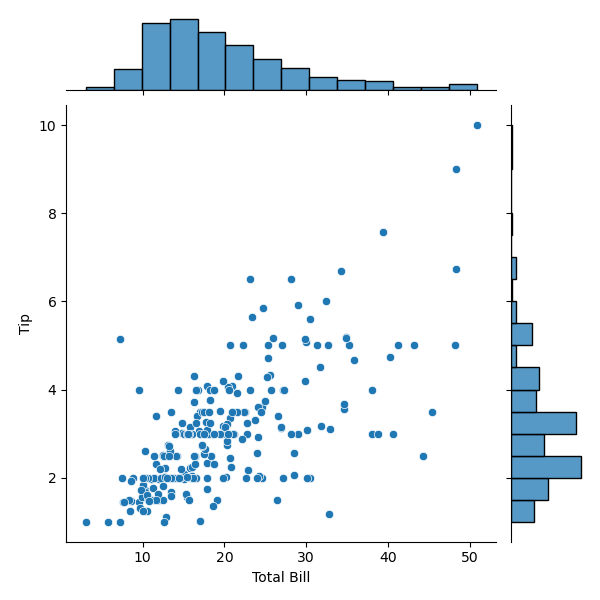

<IPython.core.display.Javascript object>


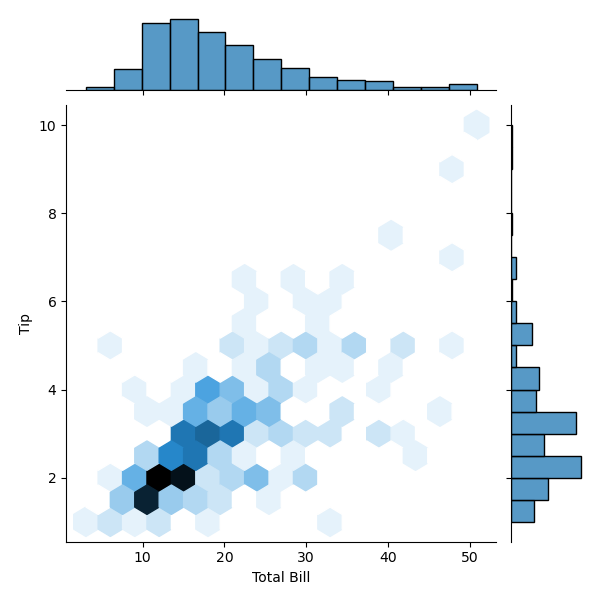

<IPython.core.display.Javascript object>


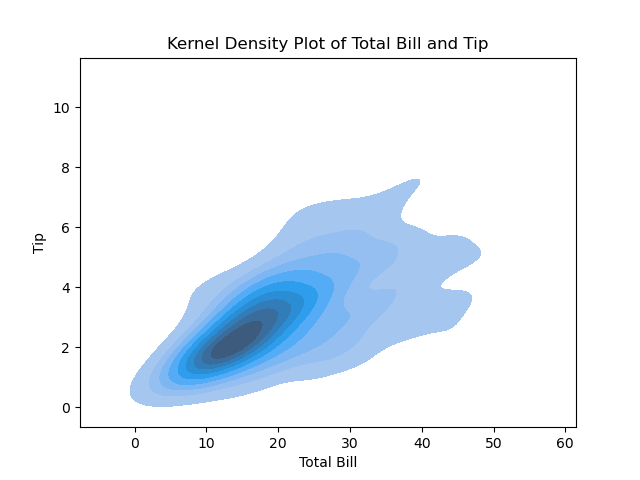

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


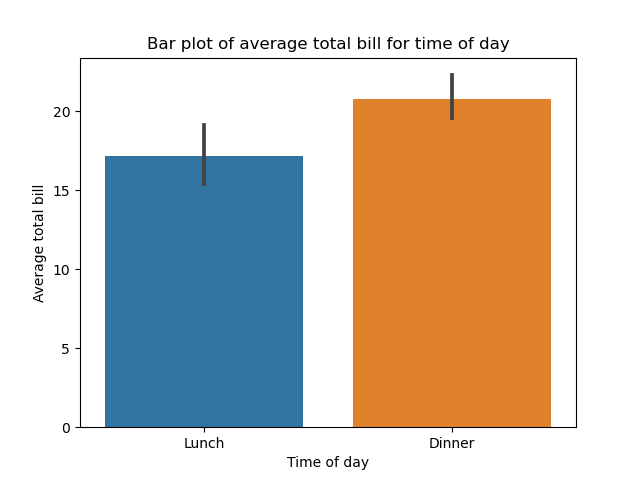

<IPython.core.display.Javascript object>


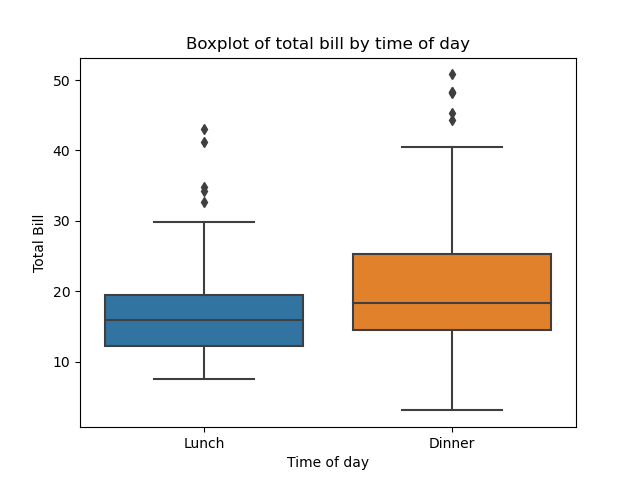

<IPython.core.display.Javascript object>


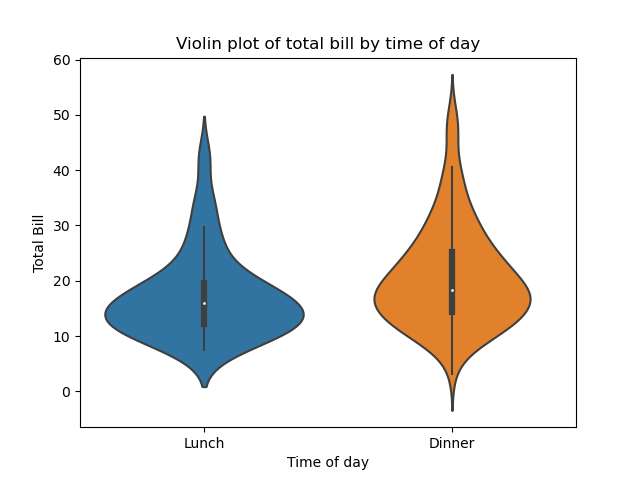

Text(0, 0.5, 'Total Bill')

In [9]:
# Jointplot 메서드를 활용하여 산점도와 히스토그램 그래프를 한 번에 그리기

joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# 육각그래프(hexbin을 사용하여 산점도가 겹쳐보이는 현상 해소) kind="hex" 활용

hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# 이차원 밀집도 그리기 (kernel Densidy = kdeplot 메서드 활용)

ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# 바 그래프 그리기

ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

# 박스 그래프 그리기

ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#바이올린 그래프 그리기 (커널밀도 + 박스플랏)

ax=plt.subplots()
ax=sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


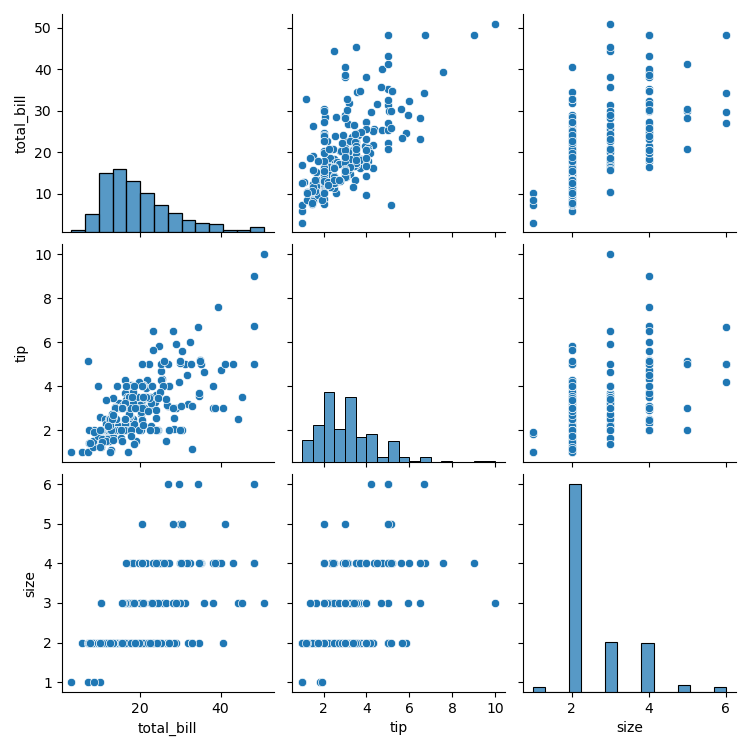

<IPython.core.display.Javascript object>


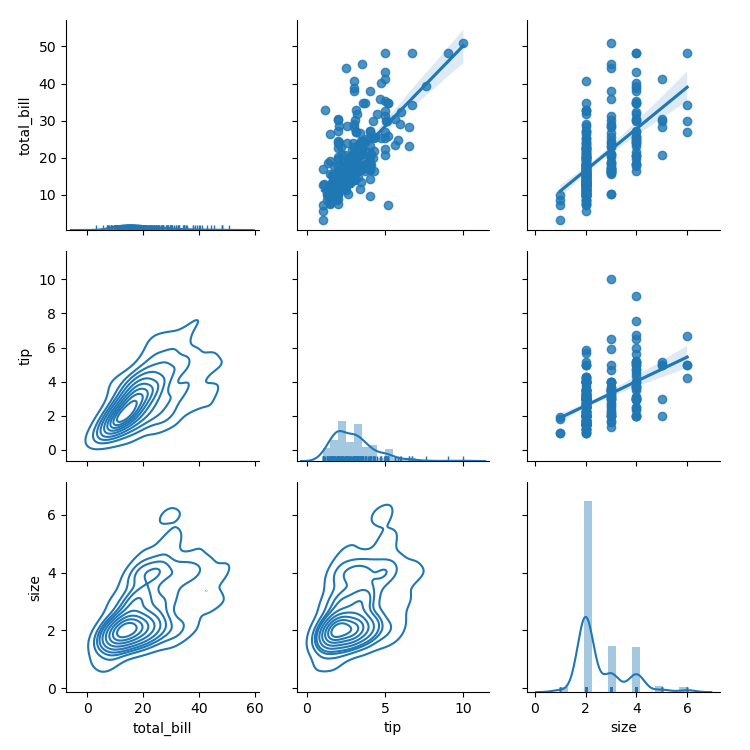

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distr

In [12]:
# 관계그래프 그리기(pairplot 활용)

fig=sns.pairplot(tips)

#map_upper, map_lower, map_diag를 활용하여 중복 교체

pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

<IPython.core.display.Javascript object>


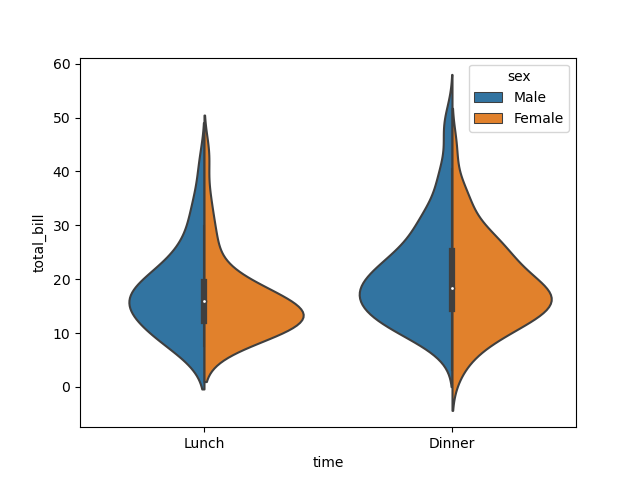

<IPython.core.display.Javascript object>


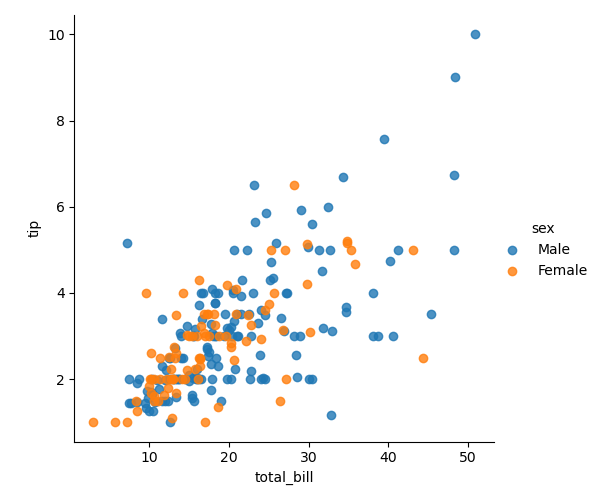

<IPython.core.display.Javascript object>


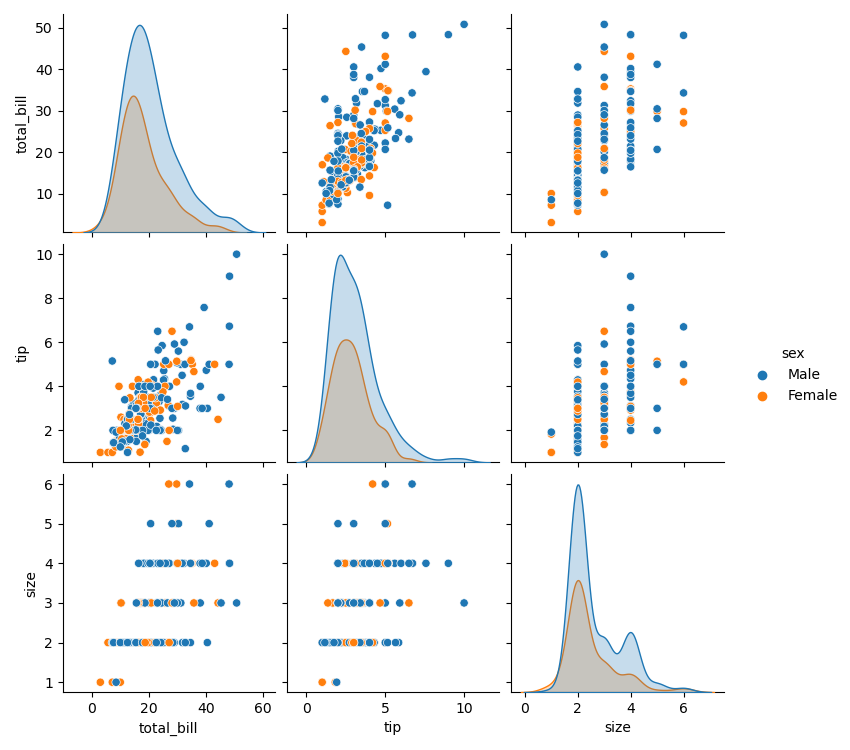

In [14]:
# seaborn 라이브러리로 바이올린 그래프 그리기 - 색상 추가

ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

# 산점도, 관계 그래프 그리기 - 색상 추가

scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)
fig = sns.pairplot(tips, hue='sex')

<IPython.core.display.Javascript object>


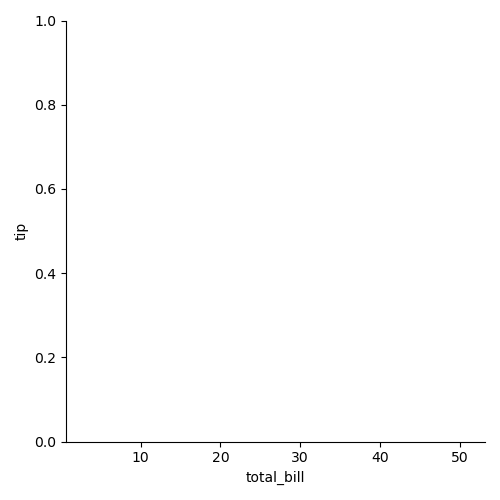

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [21]:
#산점도 그래프의 크기와 모양 조절하기 (scatter_kws 딕셔너리 형태로 조절)
## <오류나옴>
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

<IPython.core.display.Javascript object>


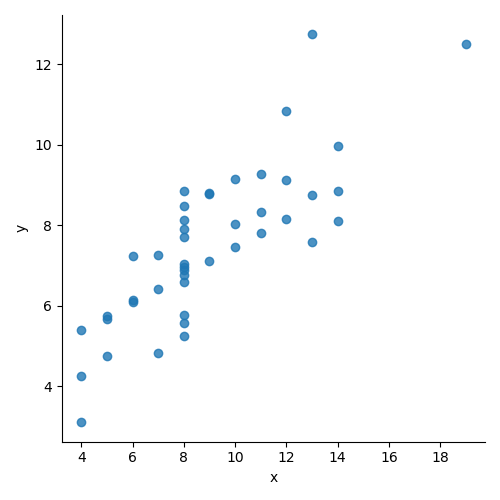

<IPython.core.display.Javascript object>


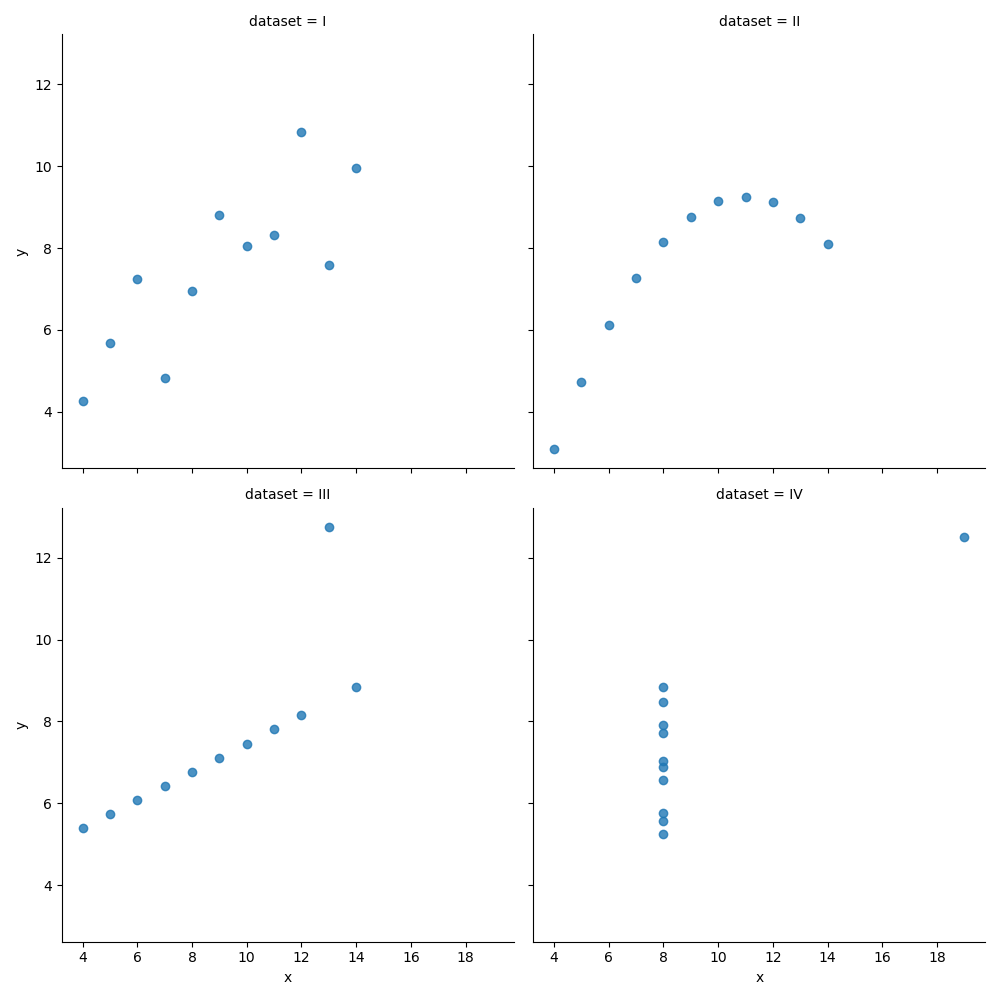

In [23]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

#그룹별로 그리기

anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

<IPython.core.display.Javascript object>


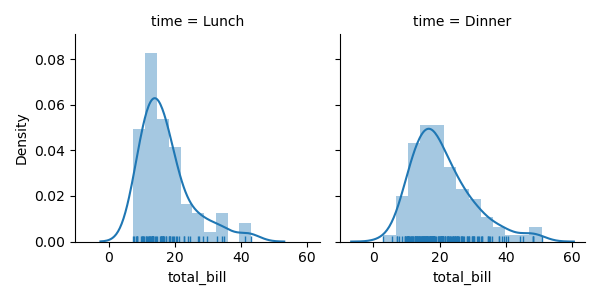

C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\duddo\anaconda3\lib\site-packages\seaborn\distr

<IPython.core.display.Javascript object>


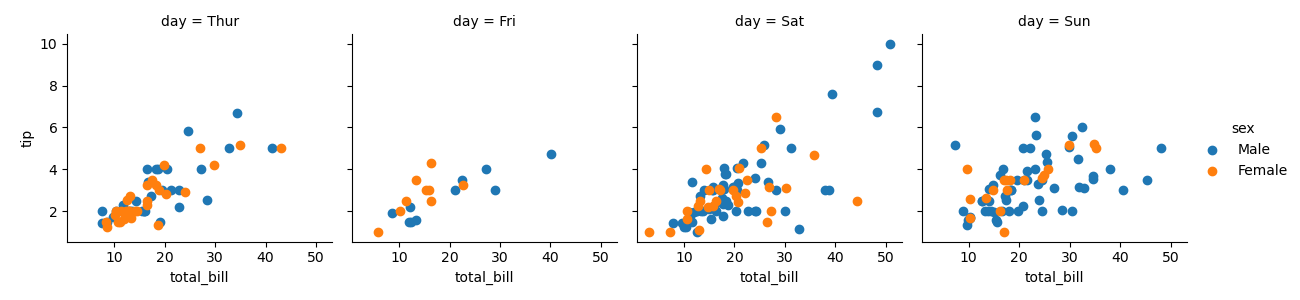

<IPython.core.display.Javascript object>


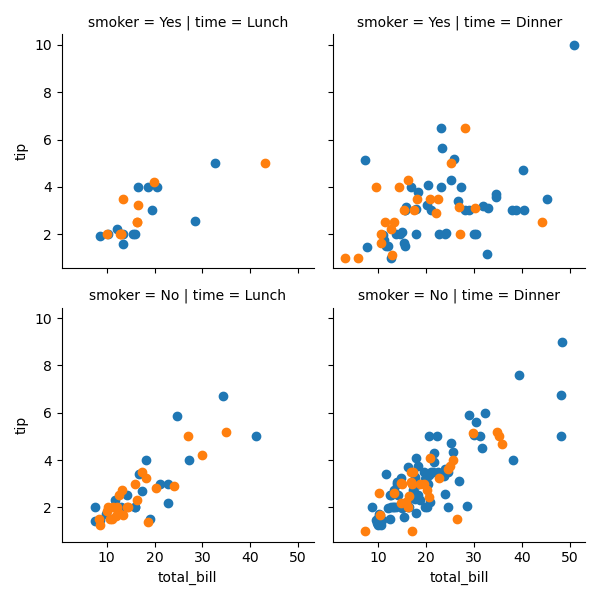

In [26]:
#FacetGrid로 그룹별 그래프를 그리기

facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

facet= sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

# 데이터프레임과 시리즈로 그래프 그리기

<IPython.core.display.Javascript object>


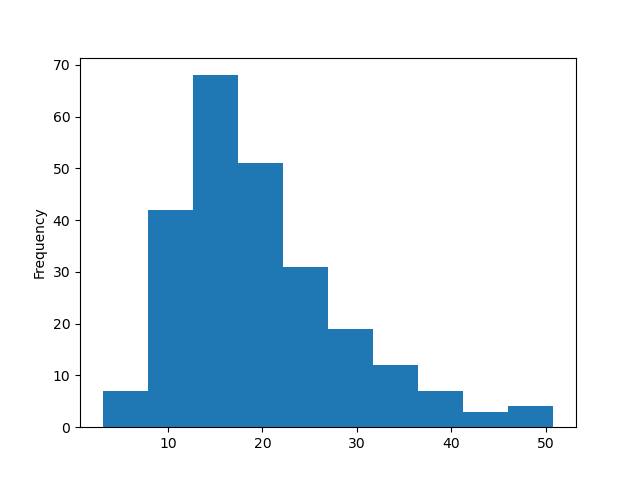

<IPython.core.display.Javascript object>


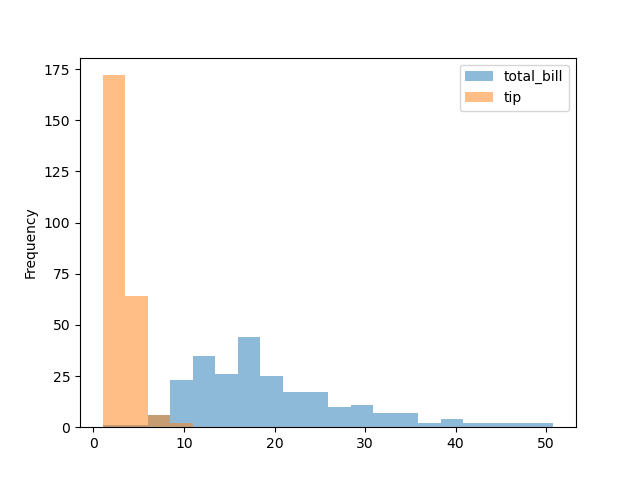

C:\Users\duddo\AppData\Local\Temp\ipykernel_5932\1055323371.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax= plt.subplots()


<IPython.core.display.Javascript object>


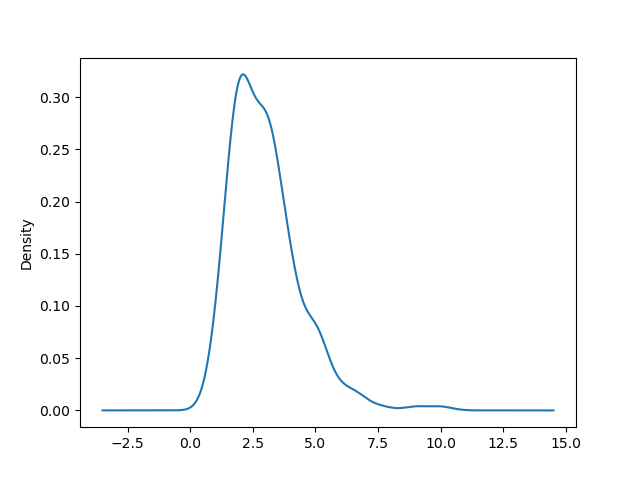

<IPython.core.display.Javascript object>


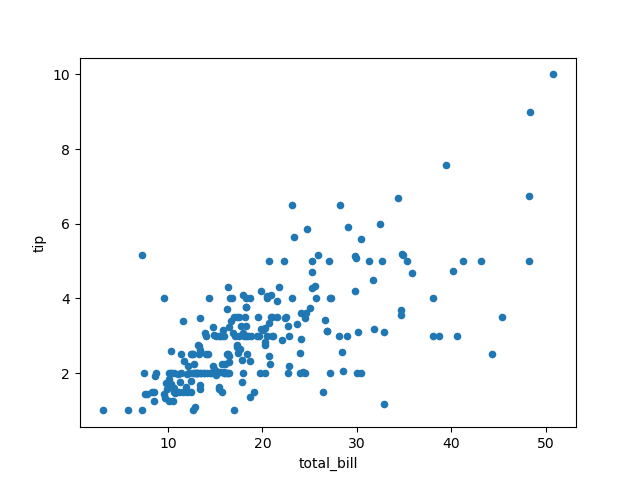

<IPython.core.display.Javascript object>


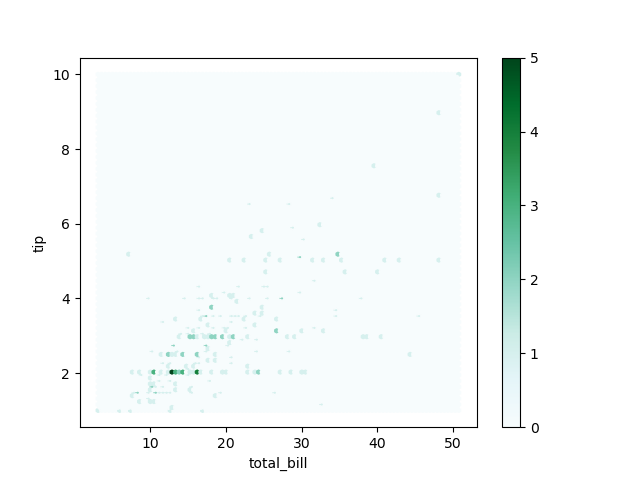

<IPython.core.display.Javascript object>


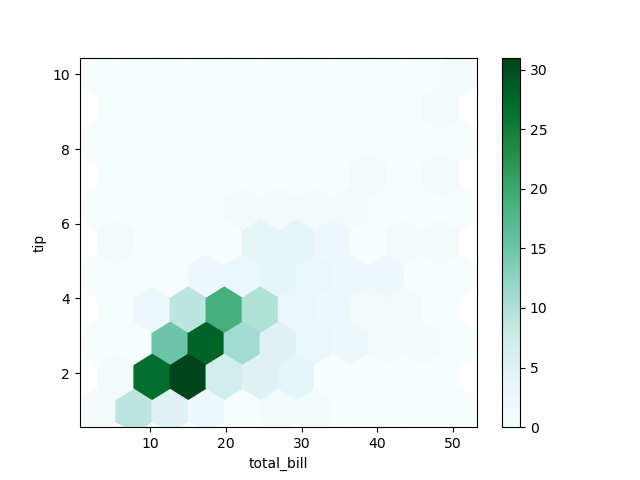

<IPython.core.display.Javascript object>


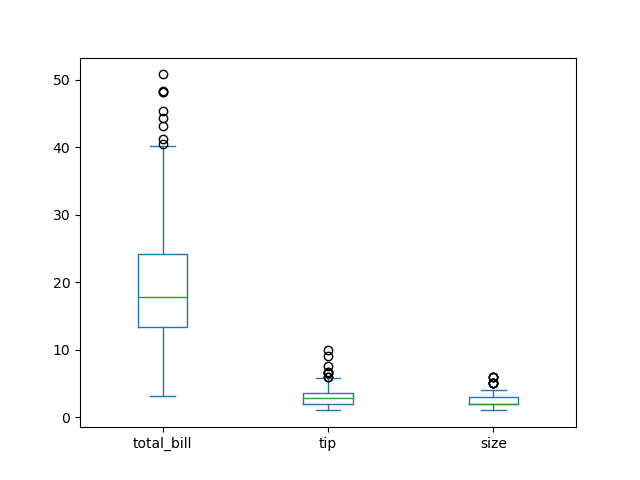

In [34]:
# plot속성에 정의된 hist메서드를 활용하기

ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

ax= plt.subplots()
ax = tips['tip'].plot.kde()

fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

# 알아두면 좋아요

<IPython.core.display.Javascript object>


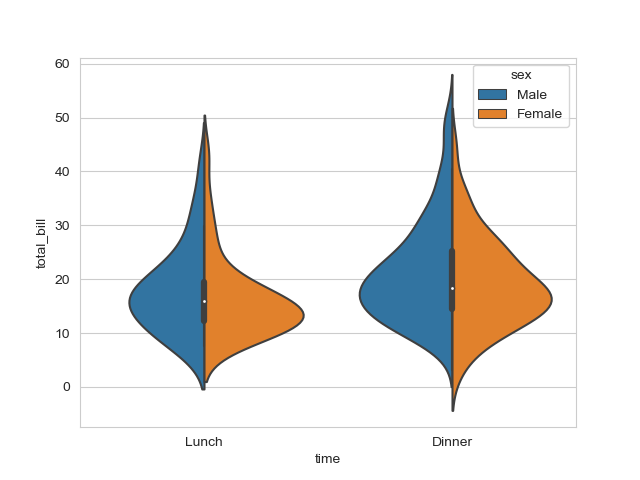

<IPython.core.display.Javascript object>


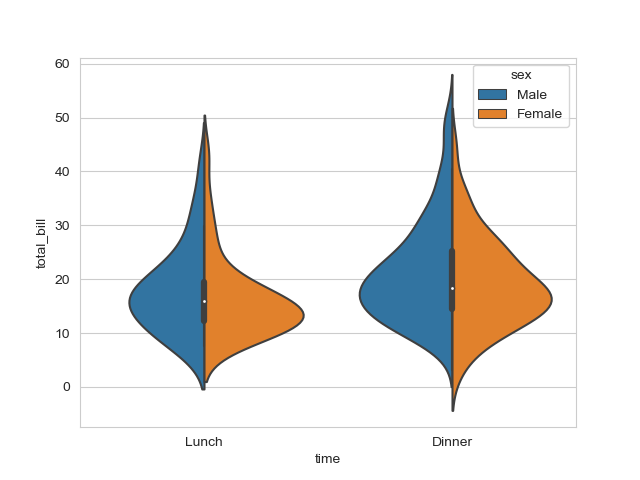

In [39]:
fig, ax = plt.subplots()

ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

# whitegrid 설정하기

sns.set_style('whitegrid')
ax = plt.subplots()

ax=sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

<IPython.core.display.Javascript object>


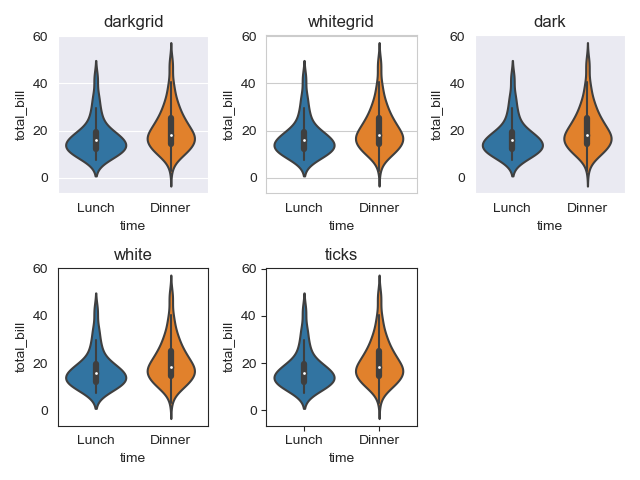

In [40]:
#for문을 이용하여 모든 스타일을 하나씩 적용하기

fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
    
fig.tight_layout()